In [1]:
import autorootcwd

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.data import heart_disease, titanic, artificial
from src.irls import IRLS


In [3]:
# disable warnings
import warnings

warnings.filterwarnings("ignore")


## Prepare data

In [4]:
# prepare the data
X_heart, y_heart = heart_disease.prepare_data()
X_titanic, y_titanic = titanic.prepare_data()
X_artificial, y_artificial, true_weights = artificial.generate_data(
    num_samples=1000, num_features=5, interaction_pairs=None
)

# split the data into train and test sets
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart,
    y_heart,
    test_size=0.2,
    random_state=42,
)
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    X_titanic,
    y_titanic,
    test_size=0.2,
    random_state=42,
)
X_train_artificial, X_test_artificial, y_train_artificial, y_test_artificial = train_test_split(
    X_artificial,
    y_artificial,
    test_size=0.2,
    random_state=42,
)

In [5]:
# print shapes and dtypes
print("X_train_heart:", X_train_heart.shape, X_train_heart.dtype)
print("y_train_heart:", y_train_heart.shape, y_train_heart.dtype)
print("X_test_heart:", X_test_heart.shape, X_test_heart.dtype)
print("y_test_heart:", y_test_heart.shape, y_test_heart.dtype)
print()
print("X_train_titanic:", X_train_titanic.shape, X_train_titanic.dtype)
print("y_train_titanic:", y_train_titanic.shape, y_train_titanic.dtype)
print("X_test_titanic:", X_test_titanic.shape, X_test_titanic.dtype)
print("y_test_titanic:", y_test_titanic.shape, y_test_titanic.dtype)
print()
print("X_train_artificial:", X_train_artificial.shape, X_train_artificial.dtype)
print("y_train_artificial:", y_train_artificial.shape, y_train_artificial.dtype)
print("X_test_artificial:", X_test_artificial.shape, X_test_artificial.dtype)
print("y_test_artificial:", y_test_artificial.shape, y_test_artificial.dtype)


X_train_heart: (242, 18) float32
y_train_heart: (242,) int64
X_test_heart: (61, 18) float32
y_test_heart: (61,) int64

X_train_titanic: (712, 12) float32
y_train_titanic: (712,) int64
X_test_titanic: (179, 12) float32
y_test_titanic: (179,) int64

X_train_artificial: (800, 5) float64
y_train_artificial: (800,) int64
X_test_artificial: (200, 5) float64
y_test_artificial: (200,) int64


## Fit and evaluate the classifiers

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9347b5f040>
Traceback (most recent call last):
  File "/home/wolejnik/anaconda3/envs/aml/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/wolejnik/anaconda3/envs/aml/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/wolejnik/anaconda3/envs/aml/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/wolejnik/anaconda3/envs/aml/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

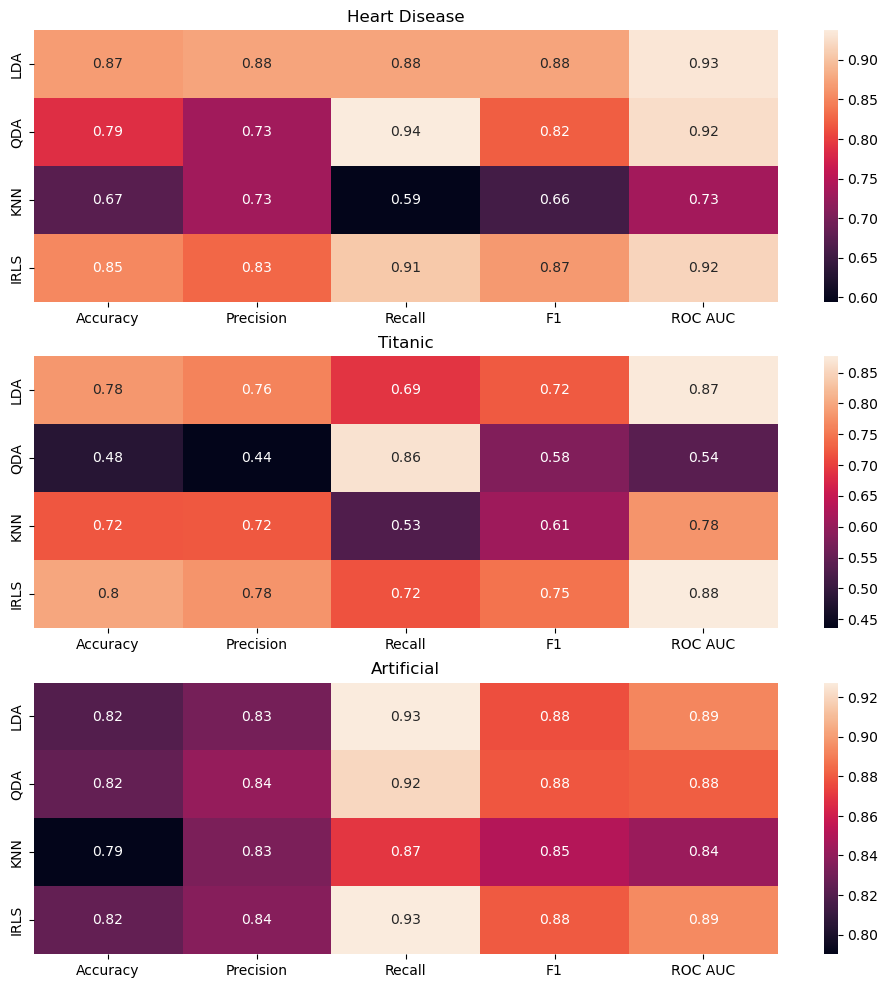

In [6]:
# Define a function to evaluate the classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    # Create classifiers
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    knn = KNeighborsClassifier()
    irls = LogisticRegression(solver="newton-cg")
    irls_custom = IRLS()

    # Fit classifiers on the training data
    lda.fit(X_train, y_train)
    qda.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    irls.fit(X_train, y_train)
    # irls_custom.fit(X_train, y_train)

    # Evaluate classifiers on the test data
    lda_scores = [
        accuracy_score(y_test, lda.predict(X_test)),
        precision_score(y_test, lda.predict(X_test)),
        recall_score(y_test, lda.predict(X_test)),
        f1_score(y_test, lda.predict(X_test)),
        roc_auc_score(y_test, lda.predict_proba(X_test)[:, 1]),
    ]

    qda_scores = [
        accuracy_score(y_test, qda.predict(X_test)),
        precision_score(y_test, qda.predict(X_test)),
        recall_score(y_test, qda.predict(X_test)),
        f1_score(y_test, qda.predict(X_test)),
        roc_auc_score(y_test, qda.predict_proba(X_test)[:, 1]),
    ]

    knn_scores = [
        accuracy_score(y_test, knn.predict(X_test)),
        precision_score(y_test, knn.predict(X_test)),
        recall_score(y_test, knn.predict(X_test)),
        f1_score(y_test, knn.predict(X_test)),
        roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]),
    ]

    irls_scores = [
        accuracy_score(y_test, irls.predict(X_test)),
        precision_score(y_test, irls.predict(X_test)),
        recall_score(y_test, irls.predict(X_test)),
        f1_score(y_test, irls.predict(X_test)),
        roc_auc_score(y_test, irls.predict_proba(X_test)[:, 1]),
    ]

    # irls_custom_scores = [
    #     accuracy_score(y_test, irls_custom.predict(X_test)),
    #     precision_score(y_test, irls_custom.predict(X_test)),
    #     recall_score(y_test, irls_custom.predict(X_test)),
    #     f1_score(y_test, irls_custom.predict(X_test)),
    #     roc_auc_score(y_test, irls_custom.predict_proba(X_test)[:, 1]),
    # ]

    # Return the scores
    return pd.DataFrame(
        [lda_scores, qda_scores, knn_scores, irls_scores],
        index=["LDA", "QDA", "KNN", "IRLS"],
        columns=["Accuracy", "Precision", "Recall", "F1", "ROC AUC"],
    )


# Evaluate the classifiers on all datasets
heart_scores = evaluate_classifiers(X_train_heart, X_test_heart, y_train_heart, y_test_heart)
titanic_scores = evaluate_classifiers(X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic)
artificial_scores = evaluate_classifiers(X_train_artificial, X_test_artificial, y_train_artificial, y_test_artificial)

# Plot the scores
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
sns.heatmap(heart_scores, annot=True, ax=axes[0])
sns.heatmap(titanic_scores, annot=True, ax=axes[1])
sns.heatmap(artificial_scores, annot=True, ax=axes[2])
axes[0].set_title("Heart Disease")
axes[1].set_title("Titanic")
axes[2].set_title("Artificial")
plt.show()

## Compare performance of custom IRLS on titanic and heart disease datasets with and without interactions

In [7]:
print("X_train_heart:", X_train_heart.shape, X_train_heart.dtype)
print("y_train_heart:", y_train_heart.shape, y_train_heart.dtype)
print("X_test_heart:", X_test_heart.shape, X_test_heart.dtype)
print("y_test_heart:", y_test_heart.shape, y_test_heart.dtype)
print()
print("X_train_titanic:", X_train_titanic.shape, X_train_titanic.dtype)
print("y_train_titanic:", y_train_titanic.shape, y_train_titanic.dtype)
print("X_test_titanic:", X_test_titanic.shape, X_test_titanic.dtype)
print("y_test_titanic:", y_test_titanic.shape, y_test_titanic.dtype)


X_train_heart: (242, 18) float32
y_train_heart: (242,) int64
X_test_heart: (61, 18) float32
y_test_heart: (61,) int64

X_train_titanic: (712, 12) float32
y_train_titanic: (712,) int64
X_test_titanic: (179, 12) float32
y_test_titanic: (179,) int64


In [9]:
# fit the model
interaction_pairs = [
    (1, 2),
    (1, 3),
    (2, 3),
    (1, 4),
    (2, 4),
    (3, 4),
    (1, 5),
    (2, 5),
    (3, 5),
    (4, 5),
    (1, 6),
    (2, 6),
    (3, 6),
    (4, 6),
    (5, 6),
    (1, 7),
    (2, 7),
    (3, 7),
    (4, 7),
    (5, 7),
    (6, 7),
    (1, 8),
    (2, 8),
    (3, 8),
    (4, 8),
    (5, 8),
    (6, 8),
    (7, 8),
    (1, 9),
    (2, 9),
    (3, 9),
    (4, 9),
    (5, 9),
    (6, 9),
    (7, 9),
    (8, 9),
    (1, 10),
    (2, 10),
    (3, 10),
    (4, 10),
    (5, 10),
    (6, 10),
    (7, 10),
    (8, 10),
    (9, 10),
]

irls_custom = IRLS(interaction_pairs=interaction_pairs, max_iter=1000, tol=1e-6)

print("num pairs:", len(irls_custom.interaction_pairs)+1)

# compare for both datasets
for X_train, X_test, y_train, y_test in [
    (X_train_heart, X_test_heart, y_train_heart, y_test_heart),
    (X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic),
]:
    # Fit the model
    irls_custom.fit(X_train, y_train)

    # Evaluate the model
    irls_custom_scores = [
        accuracy_score(y_test, irls_custom.predict(X_test)),
        precision_score(y_test, irls_custom.predict(X_test)),
        recall_score(y_test, irls_custom.predict(X_test)),
        f1_score(y_test, irls_custom.predict(X_test)),
        roc_auc_score(y_test, irls_custom.predict_proba(X_test)[:, 1]),
    ]

    # Print the scores
    print("IRLS (custom interactions) scores:")
    print(
        pd.DataFrame([irls_custom_scores], index=["IRLS"], columns=["Accuracy", "Precision", "Recall", "F1", "ROC AUC"])
    )

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, irls_custom.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], "--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(confusion_matrix(y_test, irls_custom.predict(X_test)), annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Plot the coefficients
    plt.figure(figsize=(8, 8))
    sns.heatmap(pd.DataFrame(irls_custom.coef_, columns=X_train.columns), annot=True)
    plt.show()


num pairs: 46
X shape:  (242, 18)
X rank:  18
242 64
W shape:  (242, 242)
W det:  2.0020830951818635e-146
W rank:  242
X shape:  (242, 64)
X rank:  62
H shape:  (64, 64)
H det:  0.0
H rank:  62


LinAlgError: Singular matrix